### Exploratory Data Analysis of Marketing Campaign Data of Facebook and Google

##### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_absolute_error

sns.set()
%matplotlib inline

##### Reading data from csv file

In [2]:
df = pd.read_csv("alldata.csv",index_col=['Date'], parse_dates=['Date'])

In [3]:
df.shape

(16834, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16834 entries, 2019-10-16 to 2020-07-07
Data columns (total 15 columns):
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: float64(2), int64(2), object(11)
memory usage: 2.1+ MB


In [5]:
df.isna().sum()

product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [6]:
df.head(10).T

Date,2019-10-16,2019-10-16,2019-10-16,2019-10-16,2019-10-18,2019-10-18,2019-10-18,2019-10-18,2019-10-18,2019-10-18
product,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1
phase,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance
campaign_platform,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads
campaign_type,Search,Search,Search,Search,Search,Search,Search,Search,Search,Search
communication_medium,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords
subchannel,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand
audience_type,'-,'-,'-,'-,'-,'-,'-,'-,'-,'-
creative_type,'-,'-,'-,'-,'-,'-,'-,'-,'-,'-
creative_name,'-,'-,'-,'-,'-,'-,'-,'-,'-,'-
device,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop


#### Cleaning Data

In [7]:
df.replace({"'-": np.nan},inplace=True)

In [8]:
df.isna().sum()

product                     0
phase                       0
campaign_platform           0
campaign_type               0
communication_medium        0
subchannel                  0
audience_type           15101
creative_type           15101
creative_name           15101
device                      0
age                         0
spends                      0
impressions                 0
clicks                      0
link_clicks               546
dtype: int64

In [9]:
##for i in df.columns:
##    print(i)
##    print(df[i].unique())
##    print('---'*20)

In [10]:
df['creative_type'].replace(['Carousal'],1,inplace=True)
df['creative_type'].replace(['Image'],2,inplace=True)
df['creative_name'].replace(['Carousal'],1,inplace=True)
df['creative_name'].replace(['Click'],2,inplace=True)
df['creative_name'].replace(['Girl'],3,inplace=True)
df['audience_type'].replace(['Audience 1'],1,inplace=True)
df['audience_type'].replace(['Audience 2'],2,inplace=True)
df['audience_type'].replace(['Audience 3'],3,inplace=True)

In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df["audience_type"]=imputer.fit_transform(df[["audience_type"]])
df["creative_type"]=imputer.fit_transform(df[["creative_type"]])
df["creative_name"]=imputer.fit_transform(df[["creative_name"]])
df["link_clicks"]=imputer.fit_transform(df[["link_clicks"]])

In [12]:
df.isna().sum()

product                 0
phase                   0
campaign_platform       0
campaign_type           0
communication_medium    0
subchannel              0
audience_type           0
creative_type           0
creative_name           0
device                  0
age                     0
spends                  0
impressions             0
clicks                  0
link_clicks             0
dtype: int64

In [13]:
df.describe()

,audience_type,creative_type,creative_name,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16834.000000,16834.000000,16834.000000,16834.000000
mean,1.635892,1.652048,1.932487,148.694236,287.959190,11.977783,2.170371
std,0.213216,0.152833,0.253427,483.895724,2444.450313,44.796963,18.354021
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.635892,1.652048,1.932487,0.180000,3.000000,0.000000,0.000000
50%,1.635892,1.652048,1.932487,22.535000,13.000000,2.000000,0.000000
75%,1.635892,1.652048,1.932487,110.020000,64.000000,8.000000,0.000000
max,3.000000,2.000000,3.000000,9221.960000,67454.000000,1075.000000,450.000000


### Replacing the numerical values by its original label for visualisation

In [14]:
df['creative_type'] = df['creative_type'].astype(int)
df['creative_name'] = df['creative_name'].astype(int)
df['audience_type'] = df['audience_type'].astype(int)

In [15]:
df['creative_type'].replace(1,'Carousal',inplace=True)
df['creative_type'].replace(2,'Image',inplace=True)
df['creative_name'].replace(1,'Carousal',inplace=True)
df['creative_name'].replace(2,'Click',inplace=True)
df['creative_name'].replace(3,'Girl',inplace=True)
df['audience_type'].replace(1,'Audience 1',inplace=True)
df['audience_type'].replace(2,'Audience 2',inplace=True)
df['audience_type'].replace(3,'Audience 3',inplace=True)

In [16]:
df.head(10).T

Date,2019-10-16,2019-10-16,2019-10-16,2019-10-16,2019-10-18,2019-10-18,2019-10-18,2019-10-18,2019-10-18,2019-10-18
product,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1,Product 1
phase,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance,Performance
campaign_platform,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads,Google Ads
campaign_type,Search,Search,Search,Search,Search,Search,Search,Search,Search,Search
communication_medium,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords,Search Keywords
subchannel,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand,Brand
audience_type,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1,Audience 1
creative_type,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal
creative_name,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal,Carousal
device,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop,Desktop


## Exploratory Data Analysis (EDA)

In [17]:
df.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
Date,,,,,,,,,,,,,,,
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Carousal,Carousal,Desktop,18-24,0.00,2,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Carousal,Carousal,Desktop,25-34,0.00,5,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Carousal,Carousal,Desktop,35-44,0.00,1,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Carousal,Carousal,Desktop,Undetermined,14.63,5,3,0.0
2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,Audience 1,Carousal,Carousal,Desktop,18-24,53.31,10,2,0.0


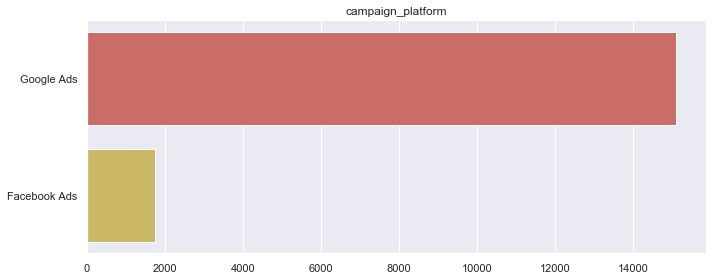

In [18]:
sns.set_palette("hls", 8)
plt.figure(figsize=(10,4))
sns.barplot(df['campaign_platform'].value_counts().values, df['campaign_platform'].value_counts().index)
plt.title('campaign_platform')
plt.tight_layout()
plt.savefig('camp_platforms.png')

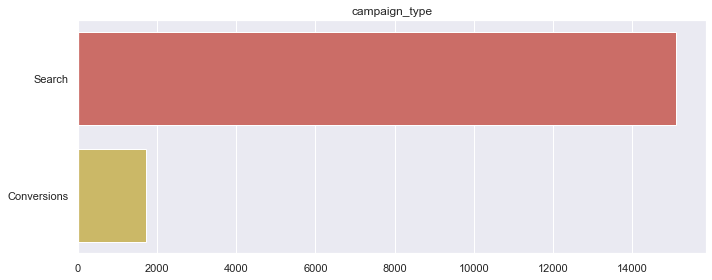

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(df['campaign_type'].value_counts().values, df['campaign_type'].value_counts().index)
plt.title('campaign_type')
plt.tight_layout()
plt.savefig('camp_type.png')

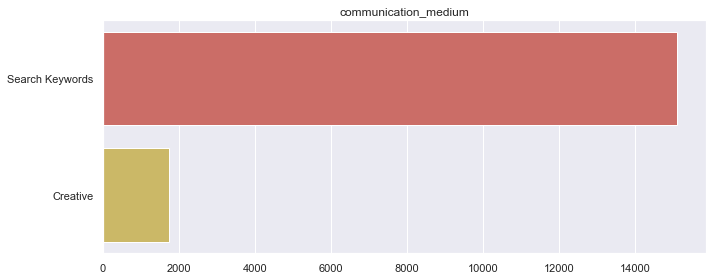

In [20]:
plt.figure(figsize=(10,4))
sns.barplot(df['communication_medium'].value_counts().values, df['communication_medium'].value_counts().index)
plt.title('communication_medium')
plt.tight_layout()

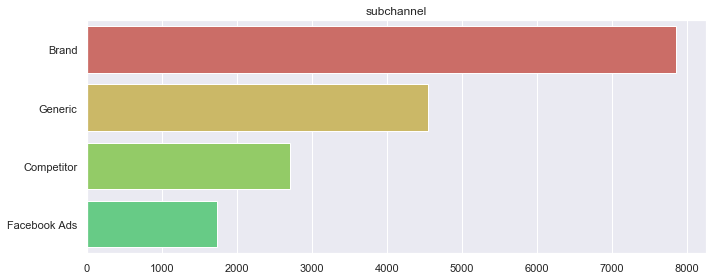

In [21]:
plt.figure(figsize=(10,4))
#sns.set_palette("husl")
sns.barplot(df['subchannel'].value_counts().values, df['subchannel'].value_counts().index)
plt.title('subchannel')
plt.tight_layout()
plt.savefig('sub.png')

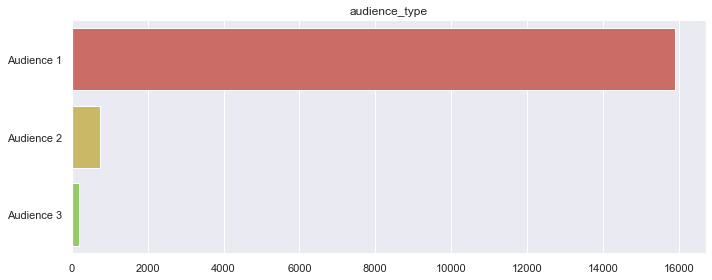

In [22]:
plt.figure(figsize=(10,4))
sns.barplot(df['audience_type'].value_counts().values, df['audience_type'].value_counts().index)
plt.title('audience_type')
plt.tight_layout()
plt.savefig('aud.png')

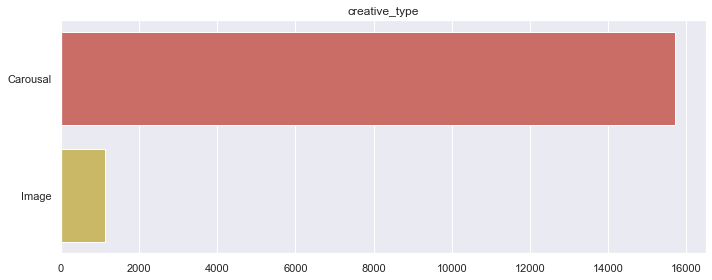

In [23]:
plt.figure(figsize=(10,4))
sns.barplot(df['creative_type'].value_counts().values, df['creative_type'].value_counts().index)
plt.title('creative_type')
plt.tight_layout()

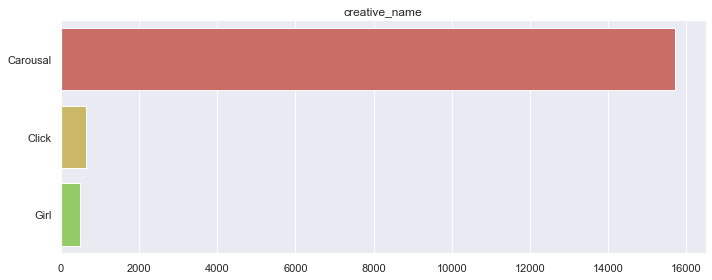

In [24]:
plt.figure(figsize=(10,4))
sns.barplot(df['creative_name'].value_counts().values, df['creative_name'].value_counts().index)
plt.title('creative_name')
plt.tight_layout()

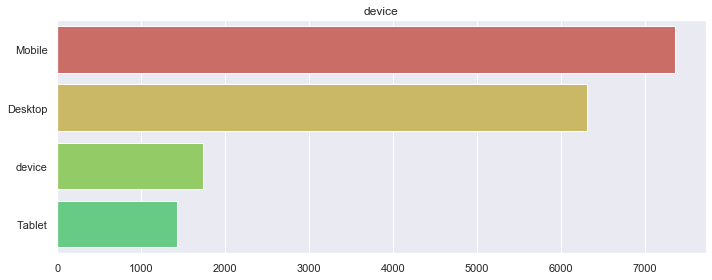

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(df['device'].value_counts().values, df['device'].value_counts().index)
plt.title('device')
plt.tight_layout()
plt.savefig('device.png')

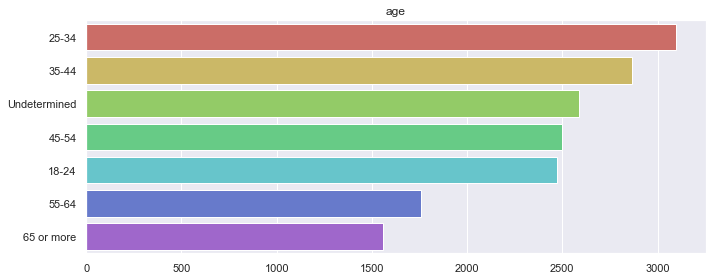

In [26]:
plt.figure(figsize=(10,4))
sns.barplot(df['age'].value_counts().values, df['age'].value_counts().index)
plt.title('age')
plt.tight_layout()

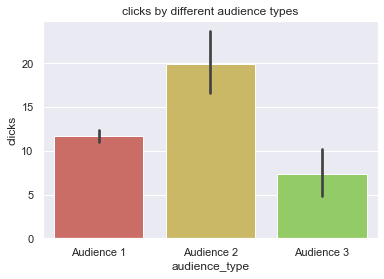

In [27]:
sns.barplot(df.audience_type,df.clicks)
plt.title("clicks by different audience types");
plt.savefig('clicks_audience.png')

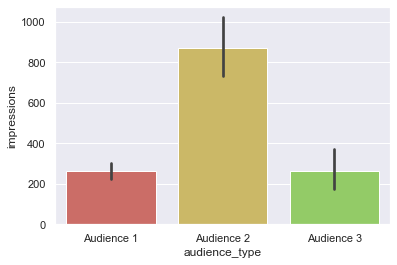

In [28]:
sns.barplot(df.audience_type,df.impressions)

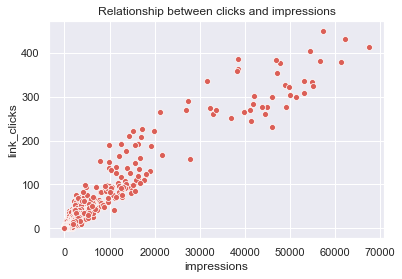

In [29]:
sns.scatterplot(df.impressions,df.link_clicks)
plt.title("Relationship between clicks and impressions");
plt.savefig('clicks_imp.png')

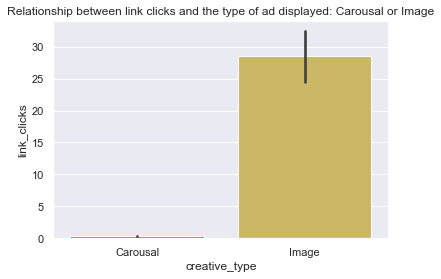

In [30]:
sns.barplot(df.creative_type,df.link_clicks)
plt.title("Relationship between link clicks and the type of ad displayed: Carousal or Image");
plt.savefig('lineclicks_imp.png')

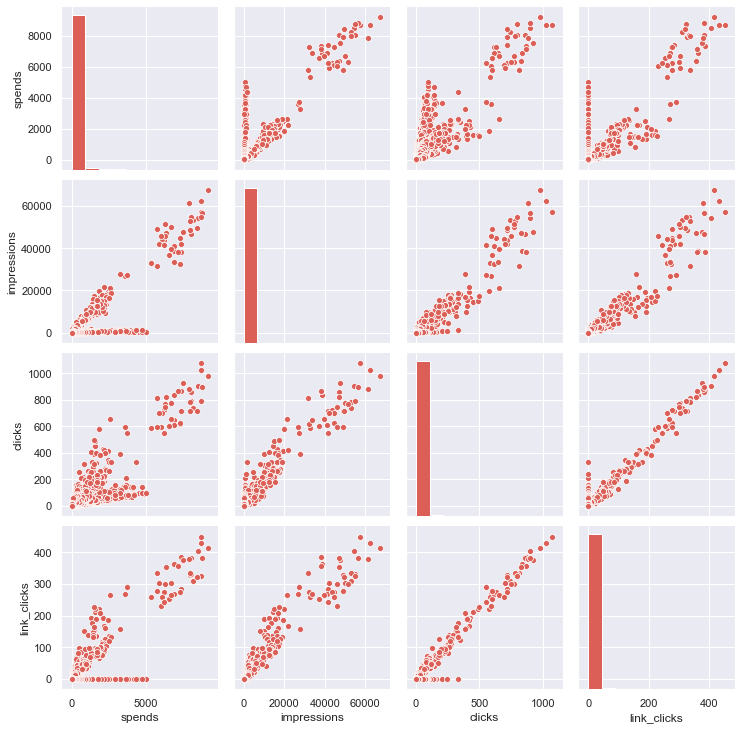

In [31]:
sns.pairplot(df)

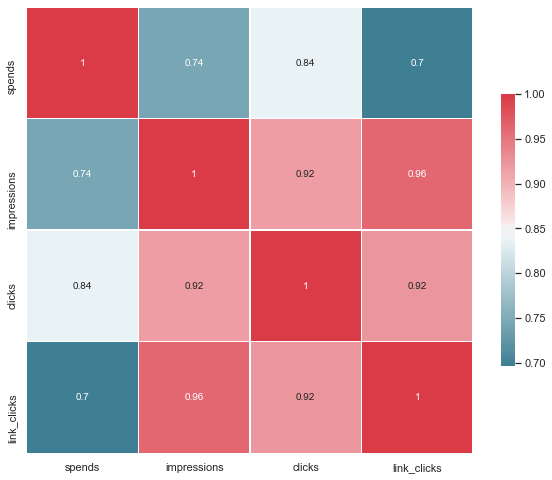

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), annot=True,cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr.png')

C:\Users\devik\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


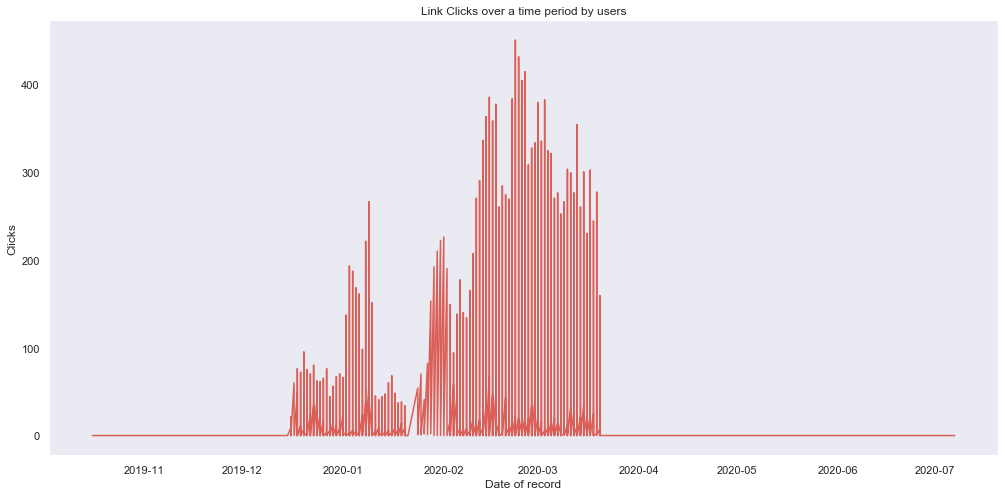

In [33]:
plt.figure(figsize=(17, 8))
plt.plot(df.link_clicks)
plt.title('Link Clicks over a time period by users')
plt.ylabel('Clicks')
plt.xlabel('Date of record')
plt.grid(False)
plt.savefig('link_time.png')

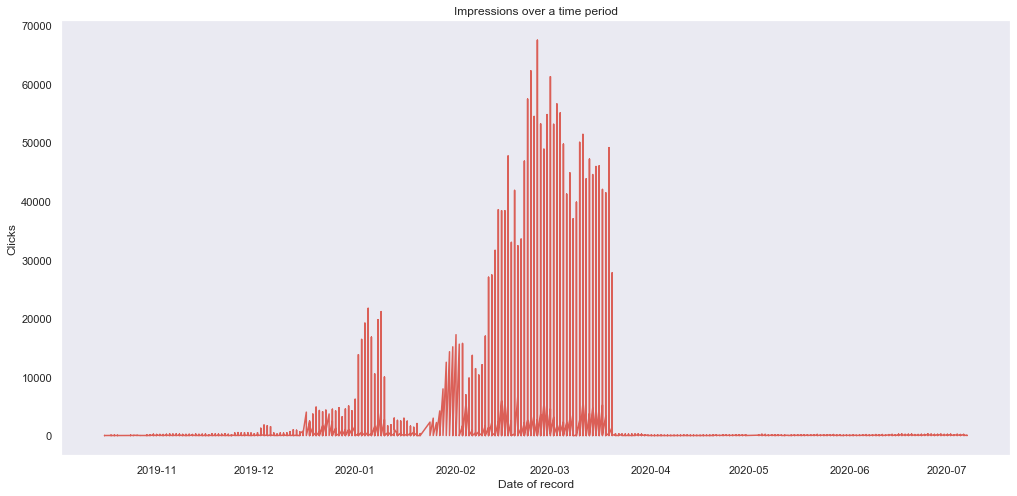

In [34]:
plt.figure(figsize=(17, 8))
plt.plot(df.impressions)
plt.title('Impressions over a time period')
plt.ylabel('Clicks')
plt.xlabel('Date of record')
plt.grid(False)
plt.savefig('aud_time.png')

In [35]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(False)

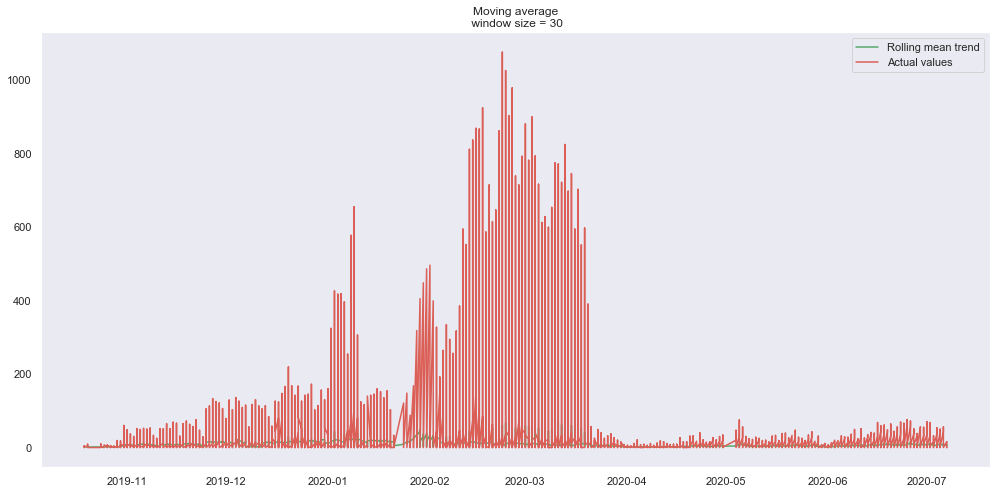

In [133]:
plot_moving_average(df.clicks,30)

### Taking initial data and converting all columns to numerical data for forecasting

In [37]:
data = pd.read_csv("alldata.csv",index_col=['Date'], parse_dates=['Date'])
data.head()

,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
Date,,,,,,,,,,,,,,,
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [38]:
data.replace({"'-": np.nan},inplace=True)

In [39]:
data.isna().sum()

product                     0
phase                       0
campaign_platform           0
campaign_type               0
communication_medium        0
subchannel                  0
audience_type           15101
creative_type           15101
creative_name           15101
device                      0
age                         0
spends                      0
impressions                 0
clicks                      0
link_clicks               546
dtype: int64

In [41]:
data['age'].replace(['18-24'], 1,inplace=True)
data['age'].replace(['25-34'], 2,inplace=True)
data['age'].replace(['35-44'], 3,inplace=True)
data['age'].replace(['45-54'], 4,inplace=True)
data['age'].replace(['55-64'], 5,inplace=True)
data['age'].replace(['65 or more'], 6,inplace=True)
data['age'].replace(['Undetermined'], 0,inplace=True)

In [42]:
data['audience_type'].replace(['Audience 1'],1,inplace=True)
data['audience_type'].replace(['Audience 2'],2,inplace=True)
data['audience_type'].replace(['Audience 3'],3,inplace=True)

In [43]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["campaigntype"] = lb_make.fit_transform(data["campaign_type"])
data["campaignplatform"] = lb_make.fit_transform(data["campaign_platform"])
data["communicationmedium"] = lb_make.fit_transform(data["communication_medium"])
data["sub_channel"] = lb_make.fit_transform(data["subchannel"])
data["devices"] = lb_make.fit_transform(data["device"])

In [44]:
data = data.drop(columns=["campaign_type","campaign_platform","communication_medium","subchannel","device","product","phase"])

In [45]:
data['creative_type'].replace(['Carousal'],1,inplace=True)
data['creative_type'].replace(['Image'],2,inplace=True)
data['creative_name'].replace(['Carousal'],1,inplace=True)
data['creative_name'].replace(['Click'],2,inplace=True)
data['creative_name'].replace(['Girl'],3,inplace=True)

In [47]:
data = data.astype(float)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16834 entries, 2019-10-16 to 2020-07-07
Data columns (total 13 columns):
audience_type          1733 non-null float64
creative_type          1733 non-null float64
creative_name          1733 non-null float64
age                    16834 non-null float64
spends                 16834 non-null float64
impressions            16834 non-null float64
clicks                 16834 non-null float64
link_clicks            16288 non-null float64
campaigntype           16834 non-null float64
campaignplatform       16834 non-null float64
communicationmedium    16834 non-null float64
sub_channel            16834 non-null float64
devices                16834 non-null float64
dtypes: float64(13)
memory usage: 2.4 MB


In [53]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data["audience_type"]=imputer.fit_transform(data[["audience_type"]])
data["creative_type"]=imputer.fit_transform(data[["creative_type"]])
data["creative_name"]=imputer.fit_transform(data[["creative_name"]])
data["link_clicks"]=imputer.fit_transform(data[["link_clicks"]])

### Now all data is numerical

In [54]:
data.isna().sum()

audience_type          0
creative_type          0
creative_name          0
age                    0
spends                 0
impressions            0
clicks                 0
link_clicks            0
campaigntype           0
campaignplatform       0
communicationmedium    0
sub_channel            0
devices                0
dtype: int64

C:\Users\devik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\devik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


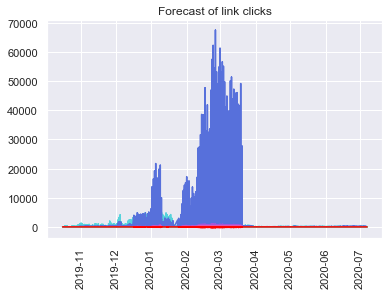

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data.link_clicks, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(data)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("Forecast of link clicks")
plt.xticks(rotation=90)
plt.savefig("pred1.png")

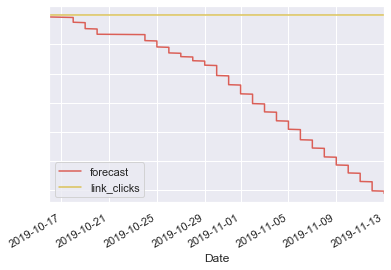

In [56]:
result_AR.plot_predict(1,500)
x=result_AR.forecast(steps=200)
plt.yticks(visible=False) 
plt.savefig("pred.png")